<a href="https://colab.research.google.com/github/Trev621/AI/blob/main/HW7/Assignment7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Author: Trevor Lacoste
The purpose of this assignment is to create an MLPClassifier model that can as accurately as possible classify an asteroid as Hazardous or Non-Hazardous (binary classification).

In [185]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from google.colab import drive

# Load the dataset from google drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/4th year/2cd semester/AI/nasa_asteroid.csv'
data = pd.read_csv(path)

data.info()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float

In [186]:
#Dropping non-relevant variables
data.drop(columns=['Neo Reference ID'], inplace=True)
data.drop(columns=['Name'], inplace=True)
data.drop(columns=['Close Approach Date'], inplace=True)
data.drop(columns=['Epoch Date Close Approach'], inplace=True)
data.drop(columns=['Orbit ID'], inplace=True)
data.drop(columns=['Orbiting Body'], inplace=True)
data.drop(columns=['Orbit Determination Date'], inplace=True)
data.drop(columns=['Equinox'], inplace=True)

#StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#Setting x to include only certain variables, and y as hazardous
X = data[['Absolute Magnitude', 'Est Dia in KM(min)', 'Semi Major Axis', 'Eccentricity', 'Semi Major Axis', 'Inclination', 'Perihelion Distance']]
X.info()
y = data['Hazardous']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Absolute Magnitude   4687 non-null   float64
 1   Est Dia in KM(min)   4687 non-null   float64
 2   Semi Major Axis      4687 non-null   float64
 3   Eccentricity         4687 non-null   float64
 4   Semi Major Axis      4687 non-null   float64
 5   Inclination          4687 non-null   float64
 6   Perihelion Distance  4687 non-null   float64
dtypes: float64(7)
memory usage: 256.4 KB


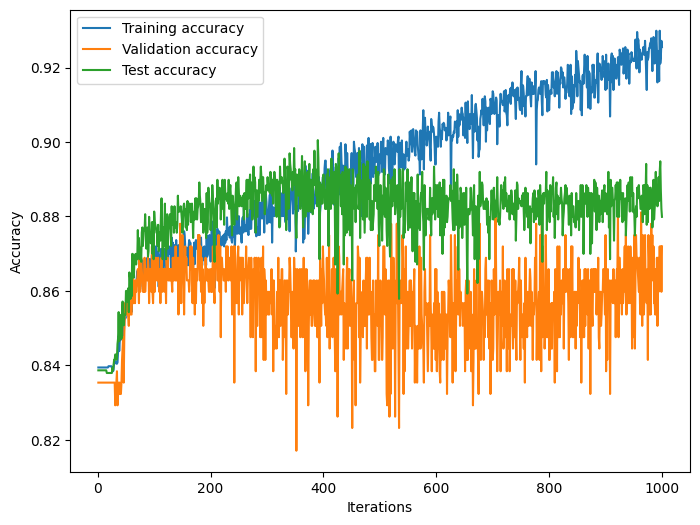

Accuracy of this MLP classifier:  0.8798862828713575


In [200]:
# Split the dataset into training, validation, and testing sets -- randomly shuffle and stratify the sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)

#  Split the training into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

# Create an MLPClassifier without early stopping
mlp = MLPClassifier(hidden_layer_sizes=(70, 50, 30), max_iter=1000)

# Initialize lists to store training, validation, and test accuracies
train_accuracies = []
val_accuracies = []
test_accuracies = []

# Train the classifier and calculate accuracies at each iteration
# partial_fit() allows for incremental learning without retraining it from scratch
for i in range(1000):
    mlp.partial_fit(X_train, y_train, classes=np.unique(y_train))
    train_accuracies.append(mlp.score(X_train, y_train))
    val_accuracies.append(mlp.score(X_val, y_val))
    test_accuracies.append(mlp.score(X_test, y_test))

# Plot the training, validation, and test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(1, 1001), train_accuracies, label='Training accuracy')
plt.plot(range(1, 1001), val_accuracies, label='Validation accuracy')
plt.plot(range(1, 1001), test_accuracies, label='Test accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

y_pred = mlp.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of this MLP classifier: ", accuracy)

In [201]:
#Training and test accuracies
train_accuracy = mlp.score(X_train, y_train)
test_accuracy = mlp.score(X_test, y_test)

print(f"Overall Training Accuracy: {train_accuracy}")
print(f"Overall Test Accuracy: {test_accuracy}")

Overall Training Accuracy: 0.9254742547425474
Overall Test Accuracy: 0.8798862828713575


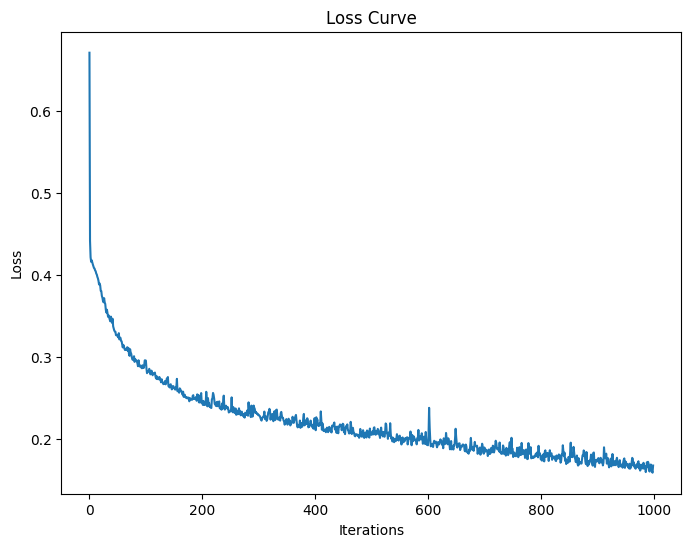

In [194]:
#Loss Curve
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.show()

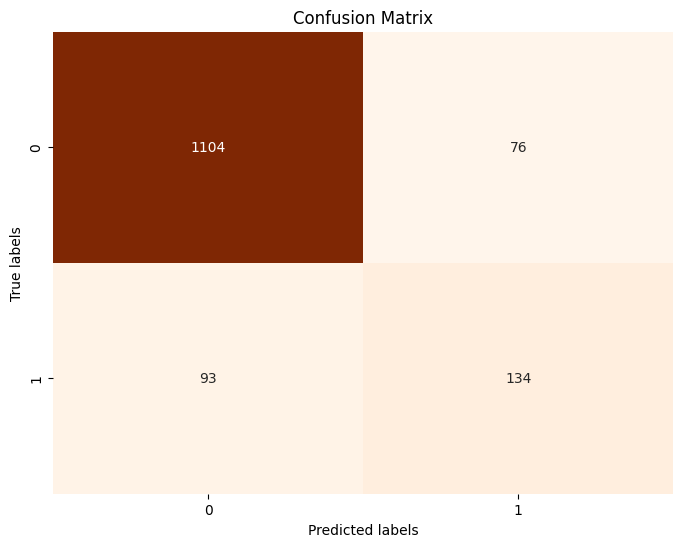

In [202]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get the predicted labels for the test set
y_pred = mlp.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()
